**WEEK - 3**

**Initial Model Training**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Replace with the actual path to your val2017 folder
val_dir = '/content/drive/MyDrive/VisionExtract/data/coco2017/val2017'

# List all files in the folder
files = os.listdir(val_dir)

# Filter only .jpg images
jpg_files = [f for f in files if f.endswith('.jpg')]

# Print number of images
print("Total .jpg images in val2017:", len(jpg_files))


Total .jpg images in val2017: 5000


In [ ]:
import os

# Replace with the actual path to your val2017 folder
val_dir = '/content/drive/MyDrive/VisionExtract/data/val2017/val2017'

# List all files in the folder
files = os.listdir(val_dir)

# Filter only .jpg images
jpg_files = [f for f in files if f.endswith('.jpg')]

# Print number of images
print("Total .jpg images in val2017:", len(jpg_files))


Total .jpg images in val2017: 5000


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models.segmentation import deeplabv3_resnet50
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt


In [ ]:
class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_names = sorted(os.listdir(image_dir))
        self.mask_names = sorted(os.listdir(mask_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        # Load image and mask
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_names[idx])

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # grayscale for binary mask

        # Apply transformations
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        # Ensure mask is binary (0 or 1)
        mask = torch.where(mask > 0, 1, 0)
        return image, mask


In [ ]:
# Resize images and masks to 224x224 and convert to tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Training dataset
train_dataset = SegmentationDataset(
    image_dir='/content/drive/MyDrive/VisionExtract/data/coco2017/original_images',
    mask_dir='/content/drive/MyDrive/VisionExtract/data/coco2017/train_masks',
    transform=transform
)

# Validation dataset (if masks are available, else just images)
val_dataset = SegmentationDataset(
    image_dir='/content/drive/MyDrive/VisionExtract/data/val2017/val2017',
    mask_dir='/content/drive/MyDrive/VisionExtract/data/coco2017/train_masks',  # optional
    transform=transform
)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load DeepLabV3 with pretrained backbone
model = deeplabv3_resnet50(pretrained=True)

# Modify classifier for binary segmentation (1 output channel)
model.classifier[4] = nn.Conv2d(256, 1, kernel_size=1)

# Move model to device
model.to(device)


Using device: cpu


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


100%|██████████| 161M/161M [00:01<00:00, 167MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
import torch
import torchvision
from torchvision.models.segmentation import deeplabv3_resnet50

# Load pretrained DeepLabv3
model = deeplabv3_resnet50(pretrained=True)

# Check model architecture
print(model)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


100%|██████████| 161M/161M [00:01<00:00, 131MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [54]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [55]:
class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, image_transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.images = sorted([f for f in os.listdir(image_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])
        self.masks = sorted([f for f in os.listdir(mask_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])
        self.image_transform = image_transform

        if len(self.images) != len(self.masks):
            raise ValueError(f"Images ({len(self.images)}) and masks ({len(self.masks)}) count mismatch!")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.image_dir, self.images[idx])).convert("RGB")
        mask = Image.open(os.path.join(self.mask_dir, self.masks[idx])).convert("L")

        # Resize to 224x224
        image = image.resize((224, 224))
        mask = mask.resize((224, 224))

        # Transform image to tensor
        if self.image_transform:
            image = self.image_transform(image)

        # Convert mask to binary tensor (0 = background, 1 = subject)
        mask = np.array(mask)
        mask = np.where(mask > 0, 1, 0)
        mask = torch.from_numpy(mask).long()

        return image, mask


In [56]:
image_transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to [3, H, W] with values [0,1]
])


In [57]:
dataset = SegmentationDataset(
    image_dir='/content/drive/MyDrive/VisionExtract/data/coco2017/original_images',
    mask_dir='/content/drive/MyDrive/VisionExtract/data/coco2017/train_masks',
    image_transform=image_transform
)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)  # Small batch size for CPU
print("Dataset length:", len(dataset))


Dataset length: 157


In [60]:
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights

# Use the latest pretrained weights
weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights)

num_classes = 2
model.classifier = torch.nn.Sequential(
    torch.nn.Conv2d(2048, num_classes, kernel_size=1)
)


In [61]:
device = torch.device("cpu")  # Force CPU

# Use pretrained DeepLabv3 with ResNet50 backbone
model = models.segmentation.deeplabv3_resnet50(pretrained=True)

num_classes = 2  # Background + subject
model.classifier = models.segmentation.deeplabv3.DeepLabHead(2048, num_classes)
model = model.to(device)


In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [67]:
img, mask = dataset[0]
print(img.shape, mask.shape)
# Should be torch.Size([3, 224, 224]) and torch.Size([224, 224])


torch.Size([3, 224, 224]) torch.Size([224, 224])


In [69]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Dataset Class ----------------
class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, image_transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.images = sorted([f for f in os.listdir(image_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])
        self.masks = sorted([f for f in os.listdir(mask_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))])
        self.image_transform = image_transform

        if len(self.images) != len(self.masks):
            raise ValueError(f"Images ({len(self.images)}) and masks ({len(self.masks)}) count mismatch!")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.image_dir, self.images[idx])).convert("RGB")
        mask = Image.open(os.path.join(self.mask_dir, self.masks[idx])).convert("L")

        # Resize
        image = image.resize((224, 224))
        mask = mask.resize((224, 224))

        # Optional data augmentation
        if np.random.rand() > 0.5:
            image = image.transpose(Image.FLIP_LEFT_RIGHT)
            mask = mask.transpose(Image.FLIP_LEFT_RIGHT)
        if np.random.rand() > 0.5:
            angle = np.random.randint(-15, 15)
            image = image.rotate(angle)
            mask = mask.rotate(angle)

        # Transform image to tensor
        if self.image_transform:
            image = self.image_transform(image)

        # Convert mask to binary tensor
        mask = np.array(mask)
        mask = np.where(mask > 0, 1, 0)
        mask = torch.from_numpy(mask).long()

        return image, mask

# ---------------- Transformations ----------------
image_transform = transforms.Compose([
    transforms.ToTensor()
])

# ---------------- Dataset & DataLoader ----------------
dataset = SegmentationDataset(
    image_dir='/content/drive/MyDrive/VisionExtract/data/coco2017/original_images',
    mask_dir='/content/drive/MyDrive/VisionExtract/data/coco2017/train_masks',
    image_transform=image_transform
)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
print("Dataset length:", len(dataset))

# ---------------- Model Setup ----------------
device = torch.device("cpu")  # CPU training

from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights

weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights)

num_classes = 2
model.classifier = nn.Sequential(
    nn.Conv2d(2048, num_classes, kernel_size=1)
)
model = model.to(device)

# ---------------- Loss & Optimizer ----------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ---------------- Checkpoint directory ----------------
checkpoint_dir = "/content/drive/MyDrive/VisionExtract/checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# ---------------- Training Loop ----------------
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, masks in dataloader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)['out']
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Save checkpoint
    checkpoint_path = os.path.join(checkpoint_dir, f"model_epoch_{epoch+1}.pth")
    torch.save({
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': avg_loss
    }, checkpoint_path)
    print(f"Checkpoint saved: {checkpoint_path}")

# ---------------- Visualization ----------------
model.eval()
with torch.no_grad():
    for images, masks in dataloader:
        images = images.to(device)
        outputs = model(images)['out']
        preds = torch.argmax(outputs, dim=1).cpu()

        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.imshow(images[0].permute(1,2,0))
        plt.title("Input Image")

        plt.subplot(1,2,2)
        plt.imshow(preds[0])
        plt.title("Predicted Mask")
        plt.show()
        break


Dataset length: 157
Epoch [1/5], Loss: 0.3628
Checkpoint saved: /content/drive/MyDrive/VisionExtract/checkpoints/model_epoch_1.pth
Epoch [2/5], Loss: 0.2543
Checkpoint saved: /content/drive/MyDrive/VisionExtract/checkpoints/model_epoch_2.pth
Epoch [3/5], Loss: 0.1857
Checkpoint saved: /content/drive/MyDrive/VisionExtract/checkpoints/model_epoch_3.pth


KeyboardInterrupt: 

In [72]:
# Load checkpoint (change path if needed)
checkpoint = torch.load("/content/drive/MyDrive/VisionExtract/checkpoints/model_epoch_3.pth", map_location=device)

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch']

print(f"Resuming training from epoch {start_epoch+1}")

num_epochs = 5  # total epochs you want
for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss = 0.0

    for images, masks in dataloader:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)['out']
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Save checkpoint
    checkpoint_path = f"/content/drive/MyDrive/VisionExtract/checkpoints/model_epoch_{epoch+1}.pth"
    torch.save({
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, checkpoint_path)
    print(f"Checkpoint saved: {checkpoint_path}")


Resuming training from epoch 4
Epoch [4/5], Loss: 0.1566
Checkpoint saved: /content/drive/MyDrive/VisionExtract/checkpoints/model_epoch_4.pth
Epoch [5/5], Loss: 0.1277
Checkpoint saved: /content/drive/MyDrive/VisionExtract/checkpoints/model_epoch_5.pth


In [74]:
# --- Load the checkpoint correctly ---
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])  # FIXED
model.eval()


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

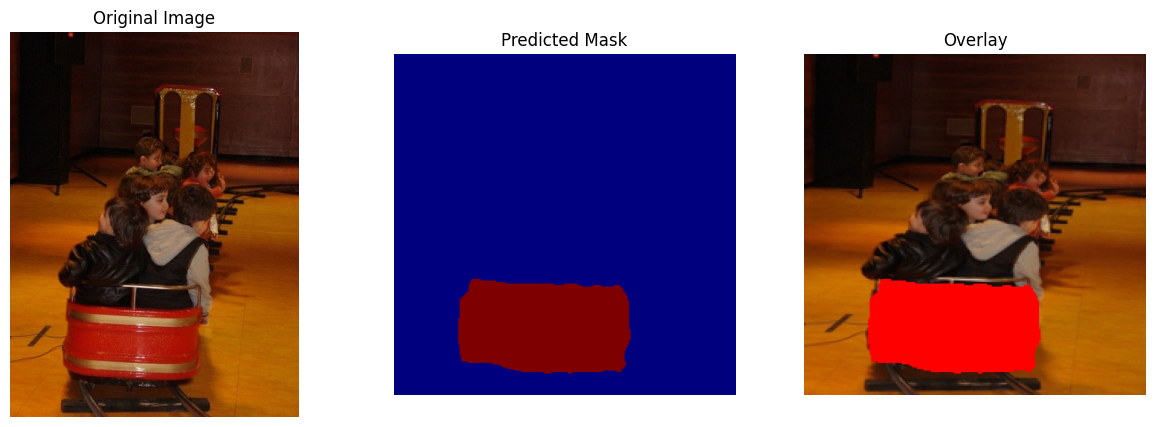

In [78]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# --- Transformation for test images ---
transform = T.Compose([
    T.Resize((224, 224)),     # resize to model input size
    T.ToTensor(),             # convert to tensor
])

# --- Load a sample test image ---
test_image_path = "/content/drive/MyDrive/VisionExtract/data/coco2017/original_images/000000001353.jpg"  # <-- change to your image
image = Image.open(test_image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# --- Run inference ---
with torch.no_grad():
    output = model(input_tensor)['out']
pred_mask = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

# --- Visualization ---
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Predicted mask
axs[1].imshow(pred_mask, cmap="jet")
axs[1].set_title("Predicted Mask")
axs[1].axis("off")

# Overlay (mask on image)
overlay = np.array(image.resize((224, 224))).copy()
overlay[pred_mask == 1] = [255, 0, 0]  # Red for class 1
axs[2].imshow(overlay)
axs[2].set_title("Overlay")
axs[2].axis("off")

plt.show()


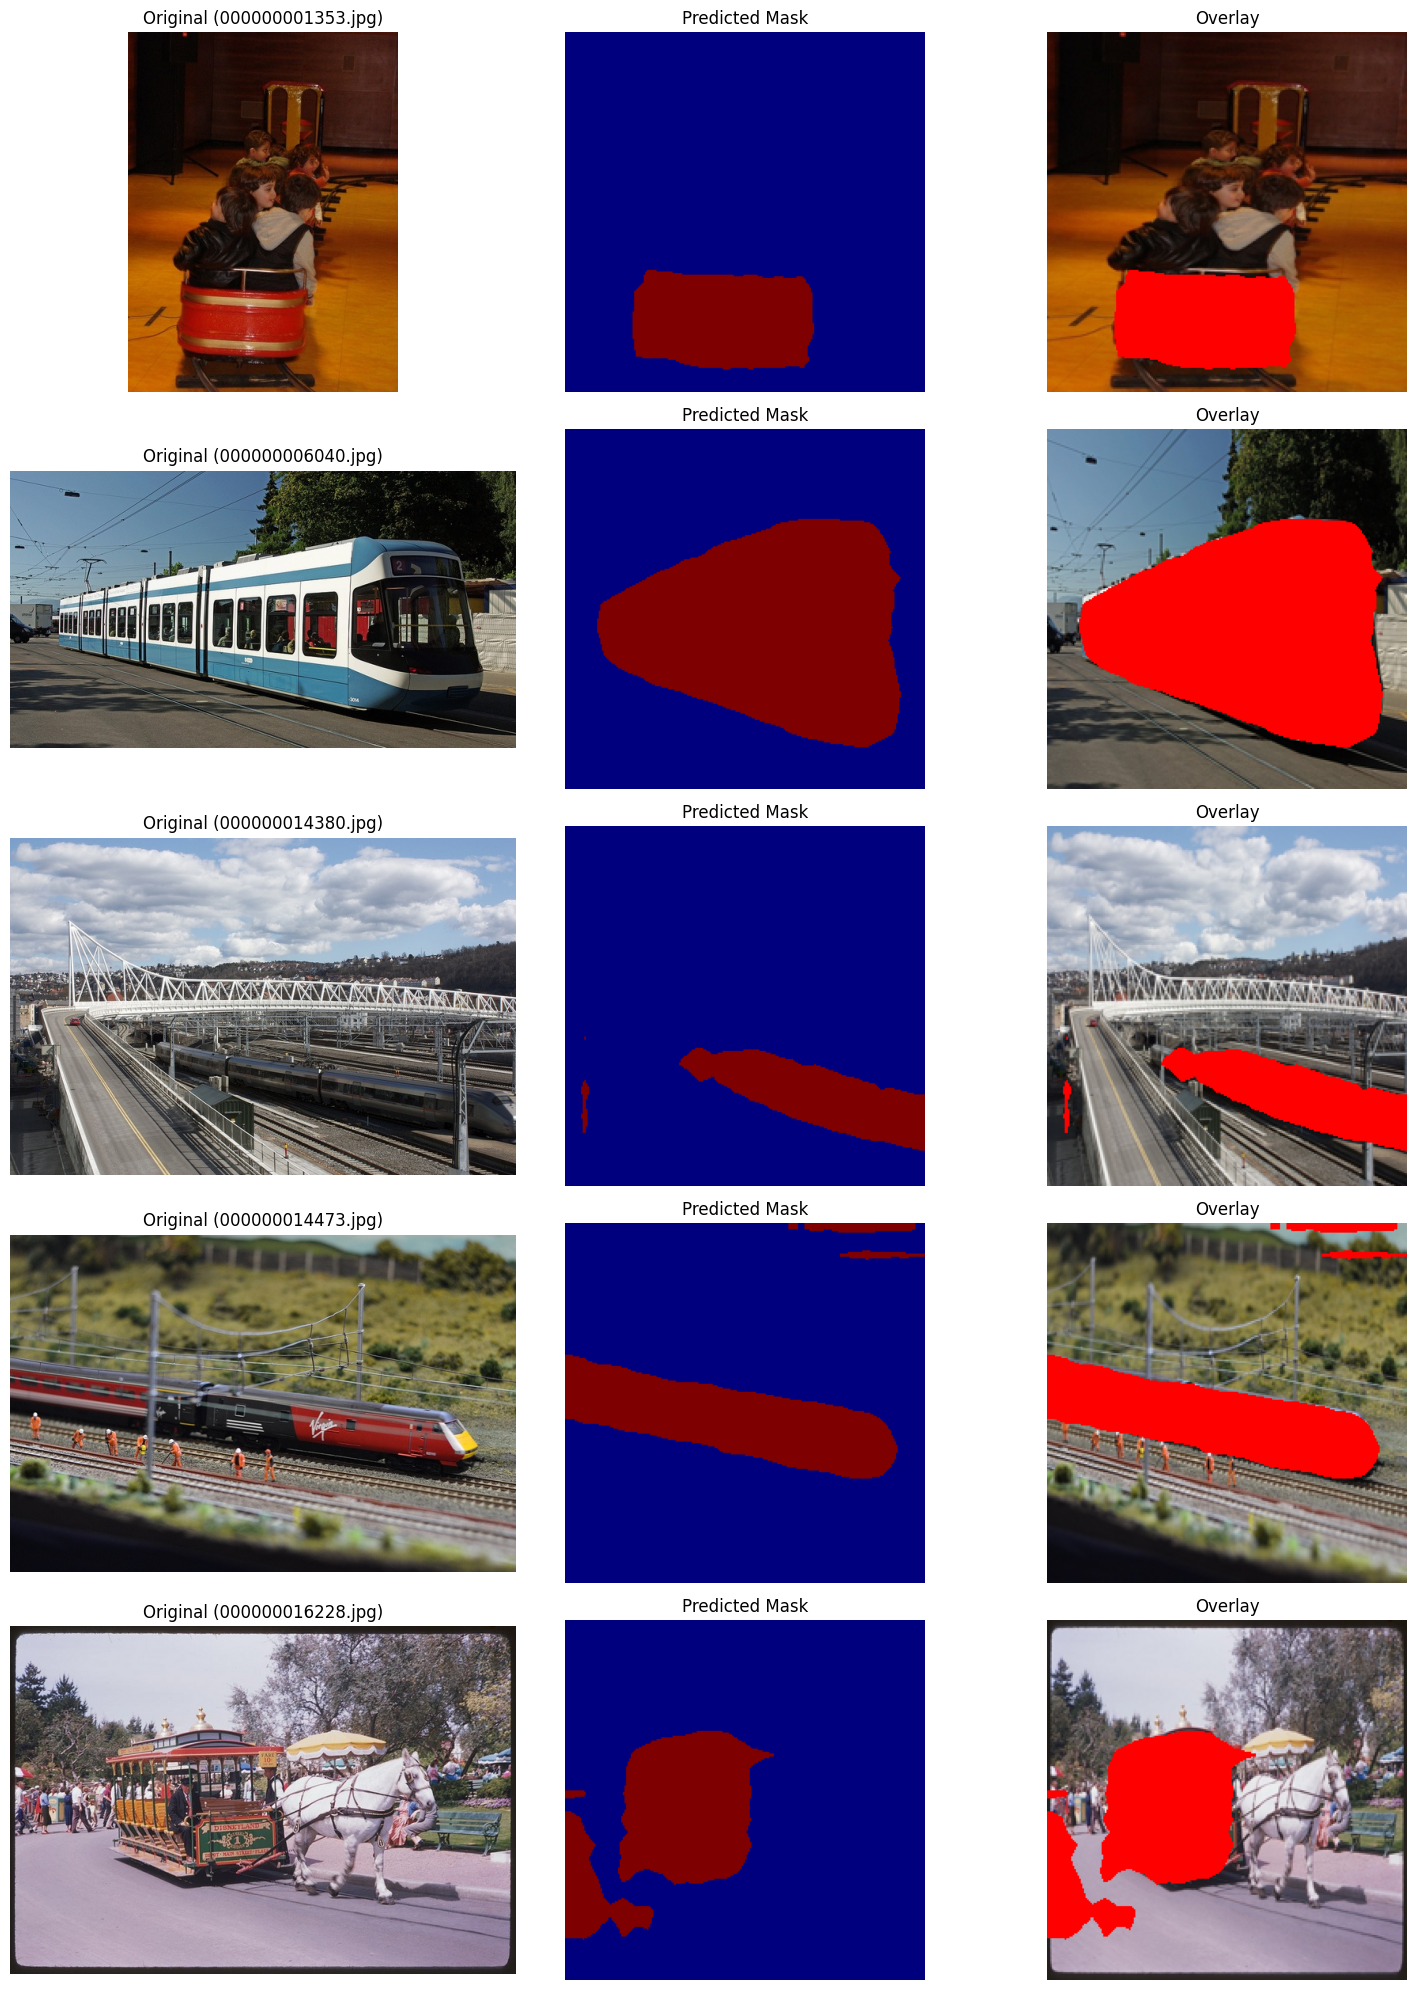

In [83]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# --- Directories ---
image_dir = "/content/drive/MyDrive/VisionExtract/data/coco2017/original_images"

# --- Transformation for test images ---
transform = T.Compose([
    T.Resize((224, 224)),  # resize to model input size
    T.ToTensor(),          # convert to tensor
])

# Pick first 5 images
image_files = sorted(os.listdir(image_dir))[:5]

# Plot 5 rows, each with 3 columns (Original, Predicted, Overlay)
plt.figure(figsize=(15, 20))

for i, img_name in enumerate(image_files):
    img_path = os.path.join(image_dir, img_name)
    image = Image.open(img_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    # --- Run inference ---
    with torch.no_grad():
        output = model(input_tensor)['out']
    pred_mask = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

    # Overlay mask on original image
    overlay = np.array(image.resize((224, 224))).copy()
    overlay[pred_mask == 1] = [255, 0, 0]  # Red for class 1

    # --- Plotting ---
    row = i * 3
    plt.subplot(len(image_files), 3, row + 1)
    plt.imshow(image)
    plt.title(f"Original ({img_name})")
    plt.axis("off")

    plt.subplot(len(image_files), 3, row + 2)
    plt.imshow(pred_mask, cmap="jet")
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.subplot(len(image_files), 3, row + 3)
    plt.imshow(overlay)
    plt.title("Overlay")
    plt.axis("off")

plt.tight_layout()
plt.show()


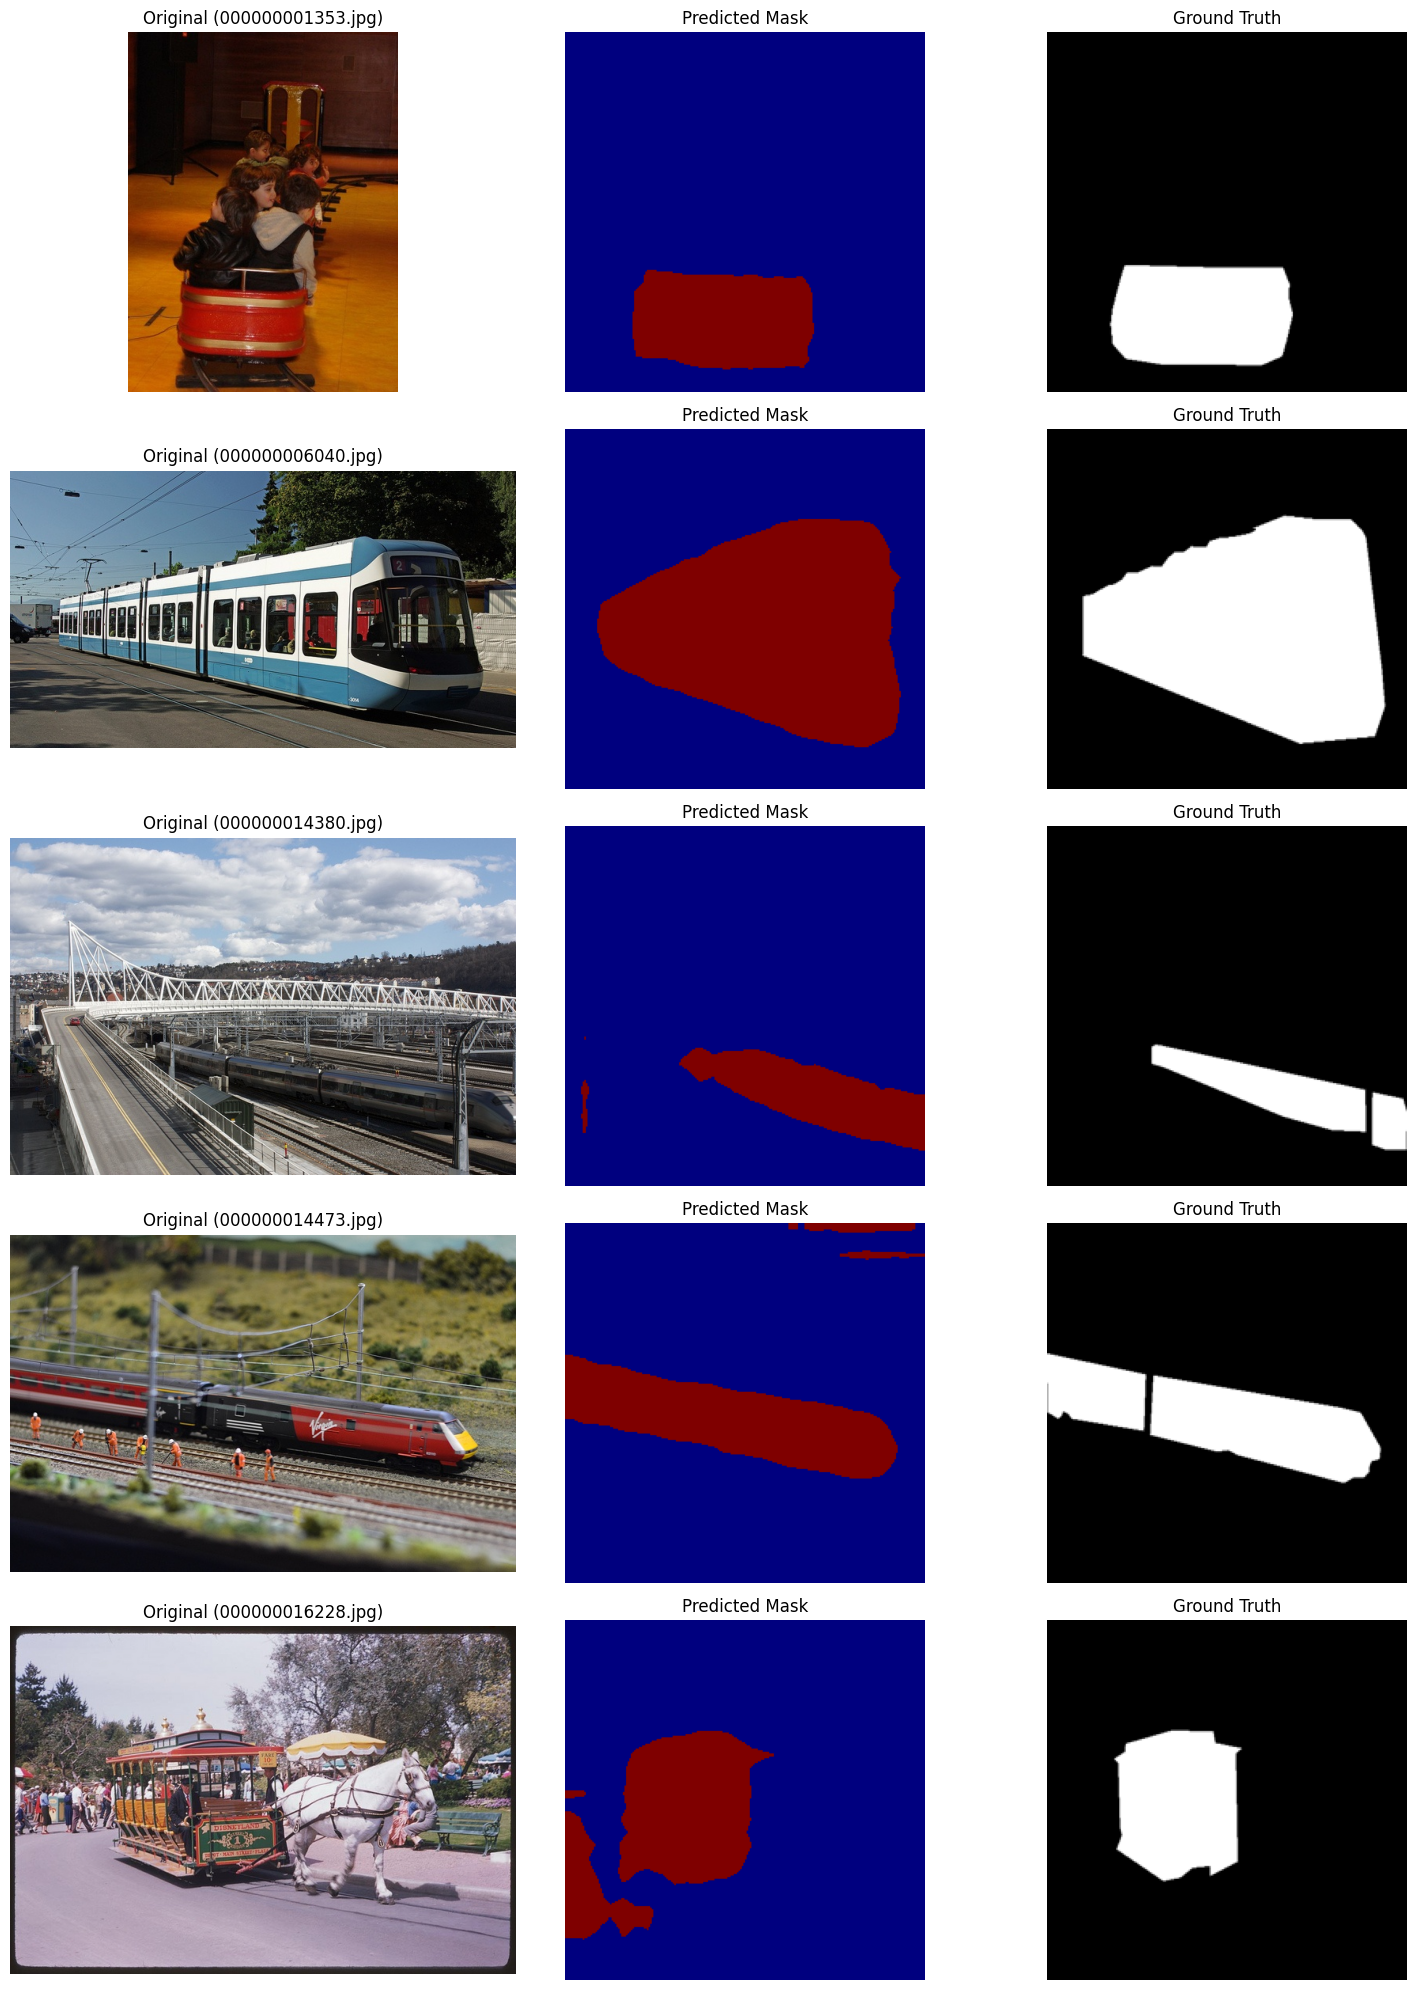

In [84]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# --- Directories ---
image_dir = "/content/drive/MyDrive/VisionExtract/data/coco2017/original_images"
mask_dir = "/content/drive/MyDrive/VisionExtract/data/coco2017/train_masks"  # ground truth masks

# --- Transformation for test images ---
transform = T.Compose([
    T.Resize((224, 224)),  # resize to model input size
    T.ToTensor(),          # convert to tensor
])

# Pick first 5 images
image_files = sorted(os.listdir(image_dir))[:5]

# Plot 5 rows, each with 3 columns (Original, Predicted, Ground Truth)
plt.figure(figsize=(15, 20))

for i, img_name in enumerate(image_files):
    img_path = os.path.join(image_dir, img_name)
    mask_name = img_name.replace(".jpg", "_mask.png")  # adjust if your mask filenames differ
    mask_path = os.path.join(mask_dir, mask_name)

    # Load original image
    image = Image.open(img_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Run inference for prediction
    with torch.no_grad():
        output = model(input_tensor)['out']
    pred_mask = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

    # Load ground truth mask
    if os.path.exists(mask_path):
        gt_mask = Image.open(mask_path).convert("L")
        gt_mask = gt_mask.resize((224, 224))
        gt_mask = np.array(gt_mask)
    else:
        gt_mask = np.zeros((224, 224))  # blank if mask not found

    # --- Plotting ---
    row = i * 3
    plt.subplot(len(image_files), 3, row + 1)
    plt.imshow(image)
    plt.title(f"Original ({img_name})")
    plt.axis("off")

    plt.subplot(len(image_files), 3, row + 2)
    plt.imshow(pred_mask, cmap="jet")
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.subplot(len(image_files), 3, row + 3)
    plt.imshow(gt_mask, cmap="gray")
    plt.title("Ground Truth")
    plt.axis("off")

plt.tight_layout()
plt.show()
